# CyberDS

## Importing Dataset

In [7]:
#Import libraries
import pandas as pd

!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
#Import dataset into a pandas dataframe
df = pd.read_csv('Cybersecurity_attacks.csv')

In [9]:
#Get the total numer of rows and columns
df.shape

(178031, 11)

In [10]:
#Get the names of the columns
df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [11]:
#View the top 5 rows of the dataset
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


In [12]:
#Get the type of the variable "df"
type(df)

pandas.core.frame.DataFrame

## Data Wrangling

In this section I will clean up the dataset to remove any bad data that can manipulate the analysis.

In [13]:
#Seperate the time column into Start Time and End Time
df[["Start Time", "End Time"]] = df['Time'].str.split("-", expand = True)

In [14]:
#Since we dont need the Time column anymore, we can drop that column as well.
df = df.drop("Time", axis = 1)

In [15]:
#View the top 5 rows of the dataset
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Start Time,End Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418,1421927418


In [16]:
#Convert Data and time to datetime and add a duration column
df['Start Time'] = pd.to_datetime(df['Start Time'], unit='s')
df['End Time'] = pd.to_datetime(df['End Time'], unit='s')
df['Duration'] = ((df['End Time'] - df['Start Time']).dt.seconds).astype(int)

In [17]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Start Time,End Time,Duration
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,2015-01-22 11:50:18,2015-01-22 11:50:18,0


In [18]:
#Get all the unique values of the column "." to see if there is any relevant information.
df["."].unique()

array(['.'], dtype=object)

In [19]:
#There is no relevant information so we can drop the column.
df = df.drop(".", axis = 1)

In [20]:
#View the top 5 rows of the dataset
df.head(5)

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Duration
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,0


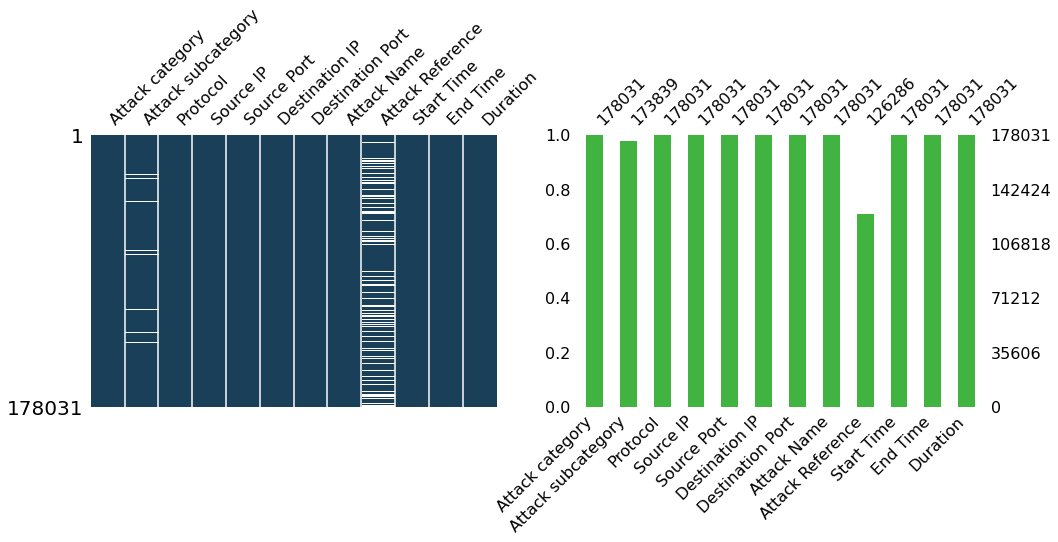

In [21]:
#Vizualize the missing data in the dataset
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,5)) #create a subplot of 1 row and 2 columns
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35)) #vizualize a matrix
msno.bar(df, ax=ax2, color=(0.25, 0.7, 0.25)) #vizualize a bar plot
plt.show()

In [22]:
#Check how many fields exactly contain null values
df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start Time                0
End Time                  0
Duration                  0
dtype: int64

In [23]:
# Fill missing values in Attack subcategory with "Not Registered"
df["Attack subcategory"] = df["Attack subcategory"].fillna("Not Registered")

In [24]:
#Check how many fields exactly contain null values
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start Time                0
End Time                  0
Duration                  0
dtype: int64

Note: Before taking care of the missing values in Attack Reference, I want to see if there is any other reason this column has so many missing values. I will address this after i have completed some further cleansing.

In [25]:
#Check how many rows are duplicates
df[df.duplicated()].shape

(6, 12)

In [26]:
#Drop duplicate rows
df = df.drop(df[df.duplicated()].index)

In [27]:
#Check if duplicate rows have been removed
df[df.duplicated()].shape

(0, 12)

Note: Valid source ports are between 0 and 65535, any port numbers outside this range is invalid.

In [28]:
#Check how many source ports and destination ports are invalid. 
invalid_sp = (df["Source Port"] < 0) | (df["Source Port"] > 65535)
invalid_dp = (df["Destination Port"] < 0) | (df["Destination Port"] > 65535)
df[invalid_sp | invalid_dp].shape

(3684, 12)

In [29]:
#Drop rows with invalid ports
df = df[~(invalid_sp | invalid_dp)].reset_index(drop=True)

In [30]:
df.shape

(174341, 12)

In [31]:
#Get the total numer of unique Attack Categories
len(df["Attack category"].unique())

14

In [32]:
#Get all the unique Attack Categories to see if there are any anamolies
df["Attack category"].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

Note: I can see that some of the categories are not consistent because of spaces and spelling errors. Eg. Backdoor vs Backdoors.

In [33]:
#Make Attack Category all caps, remove leading/trailing spaces and fix the damn backdoor!
df['Attack category'] = df['Attack category'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')

In [34]:
#Check if all values are now consistent
df["Attack category"].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [35]:
#Get the total numer of unique Protocols
len(df["Protocol"].unique())

131

In [36]:
#Get all the unique Protocols to see if there are any anamolies
df["Protocol"].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

Note: I can see that some of the categories are not consistent because of caps. Eg. tcp vs Tcp.

In [37]:
#Make Protols all caps and remove leading/trailing spaces
df['Protocol'] = df['Protocol'].str.upper().str.strip()
len(df["Protocol"].unique())

129

In [38]:
#Check how many null Attack References are there for each Attack Category
df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64

In [39]:
#Get the percentage of missing Attack References per Attack Category
((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).sort_values(ascending=False)

RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

The Attack reference in this dataset was retrieved from CVE (Common Vulnerabilities and Exposures https://cve.mitre.org) list so it is possible that the top 4 Attack Categories did not have many attack references and so I do not have to remove these rows because this will probably not manipulate my analysis. But it was important to know why the column had so much missing data.

In [40]:
#Import TCP name
tcp_ports = pd.read_csv("TCP-ports.csv")
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,tcpmux,TCP Port Service Multiplexer
2,2,compressnet,Management Utility
3,3,compressnet,Compression Process
4,5,rje,Remote Job Entry


In [41]:
#Make service names uppercase
tcp_ports["Service"] = tcp_ports["Service"].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


In [42]:
#Merge the 2 datasets and rename the service column
newdf = pd.merge(df, tcp_ports[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
newdf = newdf.rename(columns={'Service':'Destination Port Service'})
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Duration,Port,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,2,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,0,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,0,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,0,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,0,80.0,HTTP


In [43]:
#Drop the imported port column
newdf = newdf.drop(columns = ["Port"])
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Duration,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,2,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,0,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,0,HTTP


## Data Analysis

In this section I will analyse the data to discover trends and correlations in the dataset.

### Attack Categories

In [44]:
#Get the total number of Attack Categories
newdf["Attack category"].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [45]:
#Get the total percentage of each attack category
(newdf["Attack category"].value_counts()/newdf["Attack category"].value_counts().sum()) * 100

EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

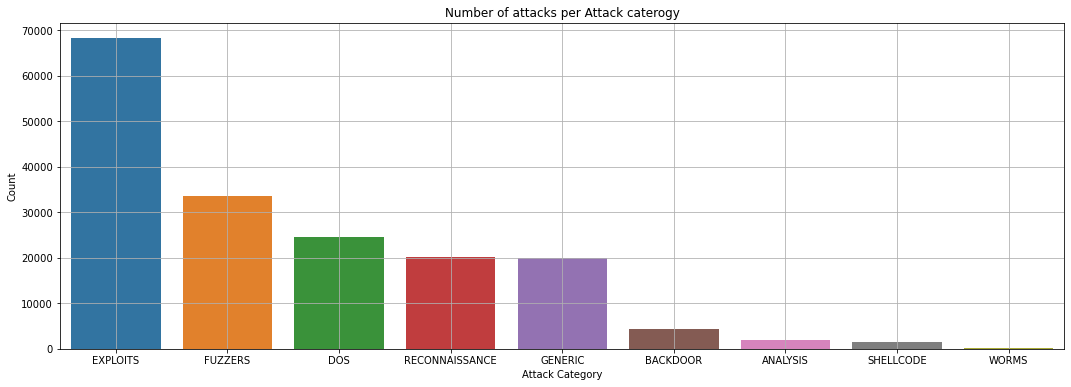

In [46]:
#Visualize the number of Attack Categories in the dataset
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index,y=newdf['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')
plt.grid(True)

Note: The dataset is biased towards the top 5 attack categories and does not contain a balanced amount fo different attacks.

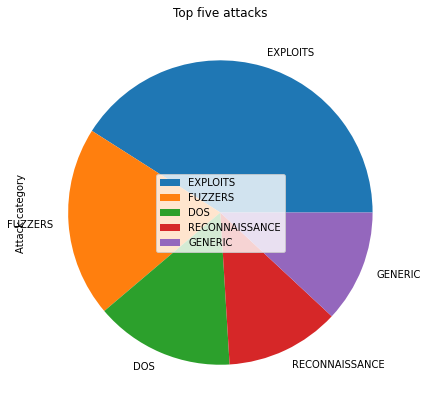

In [47]:
#Visualize the top 5 Attack Categories
a=pd.DataFrame(newdf['Attack category'].value_counts())[:5]
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top five attacks')
plt.legend(loc='center')
plt.show()

### Date Range

In [48]:
newdf['Start Time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

Note: Our dataset contains data from two days - 22nd January 2015 and 18th February 2015

### Source Ports and Destination Ports

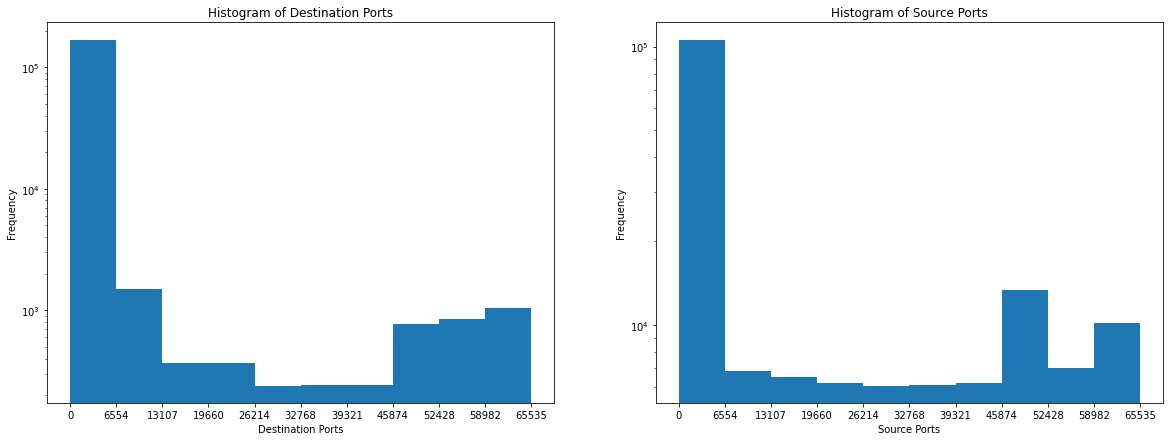

In [49]:
#Visualize the frequency for Destination and Source Port numbers
fig,(ax3, ax4) = plt.subplots(1, 2, figsize=(16,5))

#Subplot 1 (Destination Port Histogram)
count, bin_edges = np.histogram(newdf['Destination Port'])
newdf['Destination Port'].plot(kind='hist', figsize=(20, 7), xticks=bin_edges, log = True, ax = ax3)
ax3.set_title('Histogram of Destination Ports')
ax3.set_xlabel('Destination Ports')

#Subplot 2 (Source Port Histogram)
count, bin_edges = np.histogram(newdf['Source Port'])
newdf['Source Port'].plot(kind='hist', figsize=(20, 7), xticks=bin_edges, log = True, ax = ax4)
ax4.set_title('Histogram of Source Ports')
ax4.set_xlabel('Source Ports')

plt.show()

In [50]:
#Top 5 Destination Port numbers
newdf["Destination Port"].value_counts()[:5]

0      90701
80     19253
53     13842
111     9615
179     5466
Name: Destination Port, dtype: int64

In [51]:
#Top 5 Source Port numbers
newdf["Source Port"].value_counts()[:5]

0        90701
1043      6693
47439     6690
137        519
68         158
Name: Source Port, dtype: int64

In [52]:
#Get the statistics about the numerical values in the dataset
newdf.describe()

,Source Port,Destination Port,Duration
count,174341.000000,174341.000000,174341.000000
mean,15391.130382,1304.599423,2.341572
std,21707.824000,7466.035607,9.309381
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,1.000000
max,65535.000000,65535.000000,60.000000


Note: Mean and 75% percentile are very different between the Source Port and the Destination Port. However minimum and maximum is the same. I can perform Hypothesis testing to find out if the the difference is statistically significant.
$$ H_0: \mu_1=\mu_2$$$$ H_a: \mu_1\neq\mu_2$$
I can obtain one of two results from the test:

1. If the $p$-value is less than the significance level ($p$ < $\alpha$), I will reject the null hypothesis $H_0$ and affirm that the observed difference is statistically significant.
2. If the $p$-value is greater than the significance level ($p$ > $\alpha$) I will have to retain $H_0$ and conclude that the observed difference is not statistically significant.

The significance level will be 0.05

In [53]:
#Perform T-test to get the p-value
statistic, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=False)
print('p-value in T-test: ' + str(pvalue))

p-value in T-test: 0.0


Note: Because the $p$-value is very close to zero, Python approximates this measurement to 0.0. With this in mind, I can reject the null hypothesis $H_0$ regarding the equality of the means of the source and destination ports. This means that the source port of the attacks is significantly different from the destination port. It seems that most attacks are directed towards lower port numbers.

We will be using two methods for correlation calculation: 

•Pearson's correlation: evaluates the linear relationships between two variables. If the value is close to 0, there is a weak or nonexistent linear relationship between the variables. 

•Spearman's correlation: evaluates the monotonic relationships between two variables. If the value is close to 0, there is a weak or nonexistent monotonic relationship between the variables.

In [54]:
newdf.corr(method='pearson')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.137155,-0.078024
Destination Port,0.137155,1.000000,-0.026770
Duration,-0.078024,-0.026770,1.000000


In [55]:
newdf.corr(method='spearman')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.885328,0.361013
Destination Port,0.885328,1.000000,0.346909
Duration,0.361013,0.346909,1.000000


Convert Attack Categories into dummy variables

In [56]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])

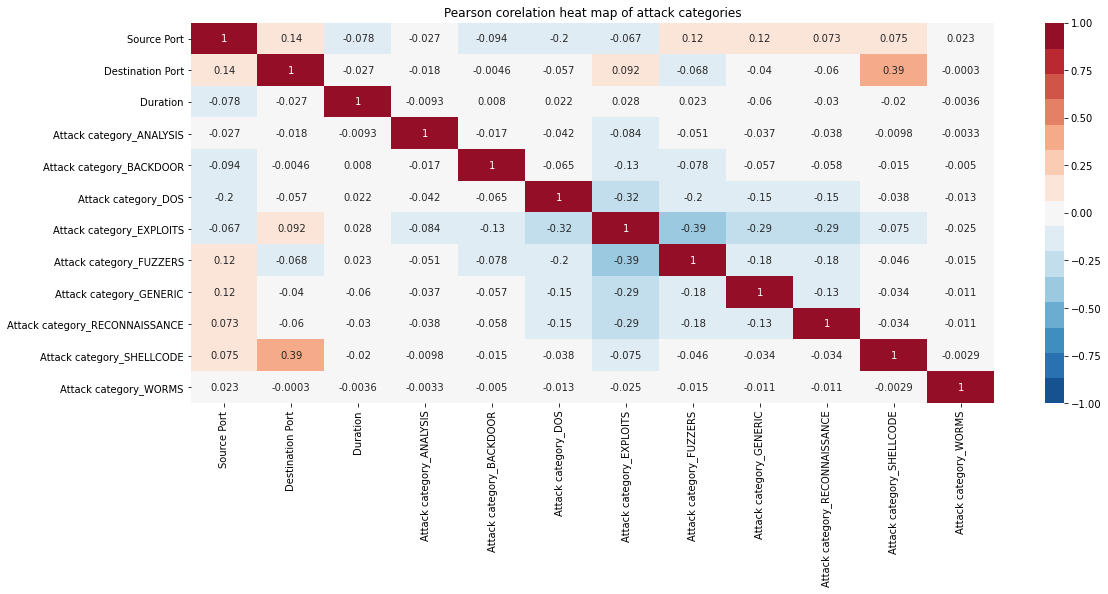

In [59]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.title("Pearson corelation heat map of attack categories")
plt.show()

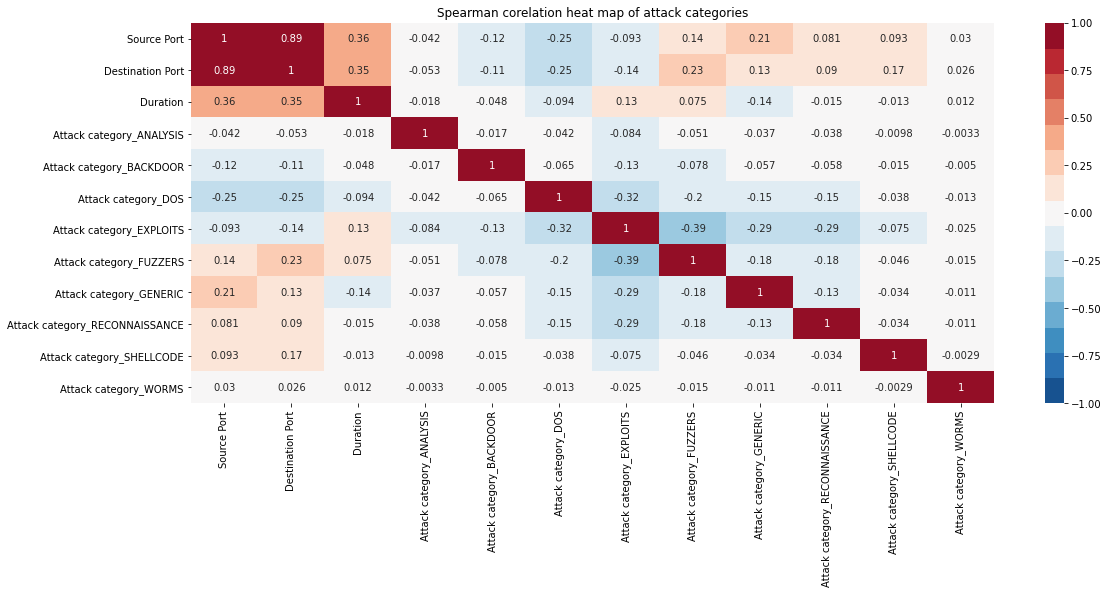

In [60]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.title("Spearman corelation heat map of attack categories")
plt.show()

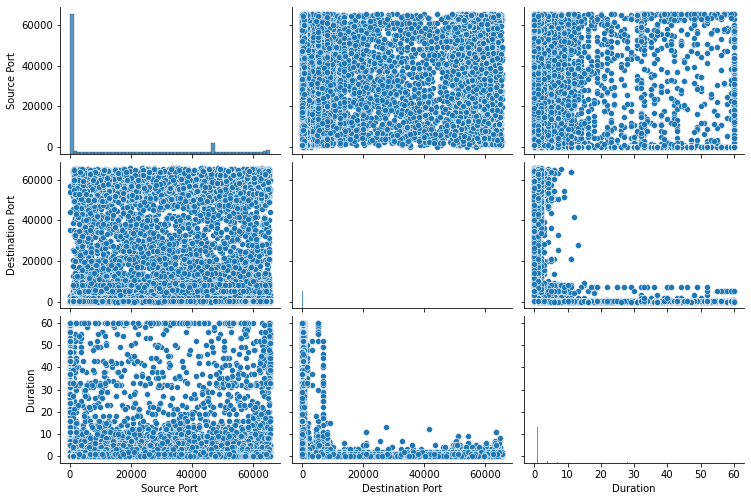

In [61]:
g = sns.pairplot(newdf)
g.fig.set_size_inches(11,7)
plt.show()